In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"/content/MY original - Copy.csv")

In [36]:
df

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update
0,S0000001,OnePlus Nord,Africa,Retail Store,UPI,18-01-2023,24000,1.0,1.0
1,S0000002,Xiaomi (India),Asia,Wholesale,Net Banking,25-08-2023,66000,3.0,4.0
2,S0000003,OnePlus Nord,Africa,Online,Credit Card,04-01-2022,74000,3.0,5.0
3,S0000004,Xiaomi (India),Europe,Retail Store,UPI,27-06-2023,65000,3.0,4.0
4,S0000007,NaN,North America,Online,Credit Card,29-01-2022,64000,3.0,4.0
...,...,...,...,...,...,...,...,...,...
624646,S0999994,Xiaomi (India),Africa,Retail Store,UPI,23-09-2022,20000,1.0,1.0
624647,S0999995,Apple iPhone,Africa,Online,Credit Card,19-11-2023,70000,3.0,4.0
624648,S0999996,Xiaomi (India),Africa,Retail Store,Net Banking,08-11-2023,64000,3.0,4.0
624649,S0999999,Apple iPhone,Africa,Retail Store,UPI,07-11-2023,72000,3.0,5.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624651 entries, 0 to 624650
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          624651 non-null  object 
 1   Brand            624649 non-null  object 
 2   Region           624648 non-null  object 
 3   Sales_Channel    624651 non-null  object 
 4   Payment_Method   624650 non-null  object 
 5   Date             624651 non-null  object 
 6   Unit_Price       624651 non-null  int64  
 7   Warranty_Years   624647 non-null  float64
 8   Software_Update  624646 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 42.9+ MB


In [38]:
df.isnull().sum()

,0
Sale_ID,0
Brand,2
Region,3
Sales_Channel,0
Payment_Method,1
Date,0
Unit_Price,0
Warranty_Years,4
Software_Update,5


In [39]:
df["Brand"].isnull().sum()

np.int64(2)

In [40]:
df["Region"].isnull().sum()

np.int64(3)

In [41]:
df["Warranty_Years"].isnull().sum()

np.int64(4)

In [42]:
df["Software_Update"].isnull().sum()

np.int64(5)

In [43]:
df.loc[df["Brand"].isnull()]

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update
4,S0000007,NaN,North America,Online,Credit Card,29-01-2022,64000,3.0,4.0
8,S0000015,NaN,Africa,Retail Store,UPI,08-07-2022,74000,3.0,5.0


In [44]:
df.loc[df["Region"].isnull()]

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update
6,S0000009,OnePlus Nord,NaN,Retail Store,UPI,18-12-2022,70000,3.0,4.0
11,S0000023,OnePlus Nord,NaN,Retail Store,UPI,27-12-2022,84000,3.0,5.0
12,S0000024,Xiaomi (India),NaN,Retail Store,UPI,12-01-2023,86000,3.0,6.0


In [45]:
for region in df['Region'].unique():
    mode_brand = df[df['Region'] == region]['Brand'].mode()
    if not mode_brand.empty:
        df.loc[(df['Region'] == region) & (df['Brand'].isnull()), 'Brand'] = mode_brand[0]

In [46]:
df.loc[df["Brand"].isnull()]

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update


In [47]:
for brand in df['Brand'].unique():
    mode_region = df[df['Brand'] == brand]['Region'].mode()
    if not mode_region.empty:
        df.loc[(df['Brand'] == brand) & (df['Region'].isnull()), 'Region'] = mode_region[0]

In [48]:
df.loc[df["Region"].isnull()]

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update


In [49]:
df

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update
0,S0000001,OnePlus Nord,Africa,Retail Store,UPI,18-01-2023,24000,1.0,1.0
1,S0000002,Xiaomi (India),Asia,Wholesale,Net Banking,25-08-2023,66000,3.0,4.0
2,S0000003,OnePlus Nord,Africa,Online,Credit Card,04-01-2022,74000,3.0,5.0
3,S0000004,Xiaomi (India),Europe,Retail Store,UPI,27-06-2023,65000,3.0,4.0
4,S0000007,OnePlus Nord,North America,Online,Credit Card,29-01-2022,64000,3.0,4.0
...,...,...,...,...,...,...,...,...,...
624646,S0999994,Xiaomi (India),Africa,Retail Store,UPI,23-09-2022,20000,1.0,1.0
624647,S0999995,Apple iPhone,Africa,Online,Credit Card,19-11-2023,70000,3.0,4.0
624648,S0999996,Xiaomi (India),Africa,Retail Store,Net Banking,08-11-2023,64000,3.0,4.0
624649,S0999999,Apple iPhone,Africa,Retail Store,UPI,07-11-2023,72000,3.0,5.0


In [50]:
df.loc[df["Warranty_Years"].isnull()]

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update
7,S0000012,Realme,Europe,Retail Store,UPI,21-11-2022,40000,NaN,2.0
21,S0000038,Xiaomi (India),Europe,Retail Store,UPI,01-01-2023,70000,NaN,4.0
39,S0000065,Xiaomi (India),Asia,Retail Store,UPI,20-05-2023,39000,NaN,2.0
55,S0000093,Xiaomi (India),Africa,Wholesale,Debit Card,13-10-2023,74000,NaN,NaN


In [51]:
df.loc[df["Software_Update"].isnull()]

,Sale_ID,Brand,Region,Sales_Channel,Payment_Method,Date,Unit_Price,Warranty_Years,Software_Update
9,S0000017,Realme,Europe,Retail Store,Debit Card,18-05-2022,70000,3.0,NaN
13,S0000028,Xiaomi (India),Europe,Wholesale,NaN,02-09-2022,12000,1.0,NaN
33,S0000056,Apple iPhone,Africa,Online,Cash,05-03-2023,74000,3.0,NaN
46,S0000077,Xiaomi (India),South America,Retail Store,UPI,09-08-2023,12000,1.0,NaN
55,S0000093,Xiaomi (India),Africa,Wholesale,Debit Card,13-10-2023,74000,NaN,NaN


In [52]:
def fill_software_update(row):
    if pd.isnull(row['Software_Update']):
        if row['Unit_Price'] < 30000:
            return 1
        elif 30000 <= row['Unit_Price'] < 60000:
            return 3
        else:
            return 6
    return row['Software_Update']

df['Software_Update'] = df.apply(fill_software_update, axis=1)

In [53]:
df["Software_Update"].isnull().sum()

np.int64(0)

In [54]:
def fill_warranty_years(row):
    if pd.isnull(row['Warranty_Years']):
        if 11000 <= row['Unit_Price'] < 30000:
            return 1
        elif 30000 <= row['Unit_Price'] < 60000:
            return 2
        elif row['Unit_Price'] >= 60000:
            return 3
    return row['Warranty_Years']

df['Warranty_Years'] = df.apply(fill_warranty_years, axis=1)

In [55]:
df["Warranty_Years"].isnull().sum()

np.int64(0)

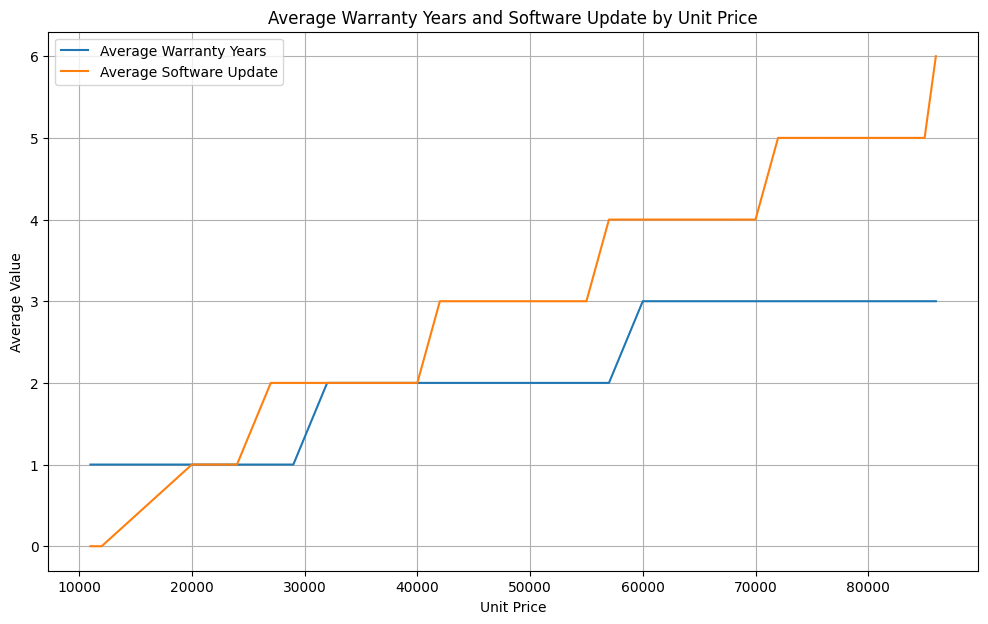

In [56]:

avg_by_price = df.groupby('Unit_Price')[['Warranty_Years', 'Software_Update']].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=avg_by_price, x='Unit_Price', y='Warranty_Years', label='Average Warranty Years')
sns.lineplot(data=avg_by_price, x='Unit_Price', y='Software_Update', label='Average Software Update')
plt.title('Average Warranty Years and Software Update by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

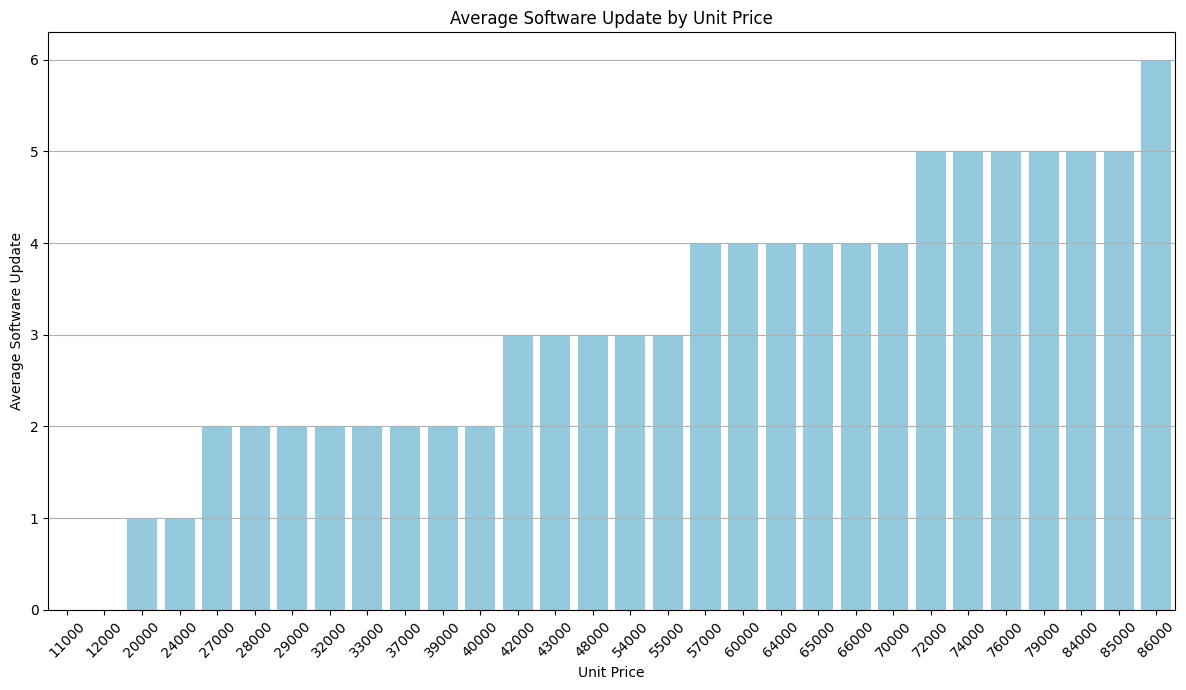

In [57]:

avg_software_update_by_price = df.groupby('Unit_Price')['Software_Update'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=avg_software_update_by_price, x='Unit_Price', y='Software_Update', color='skyblue')
plt.title('Average Software Update by Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Average Software Update')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

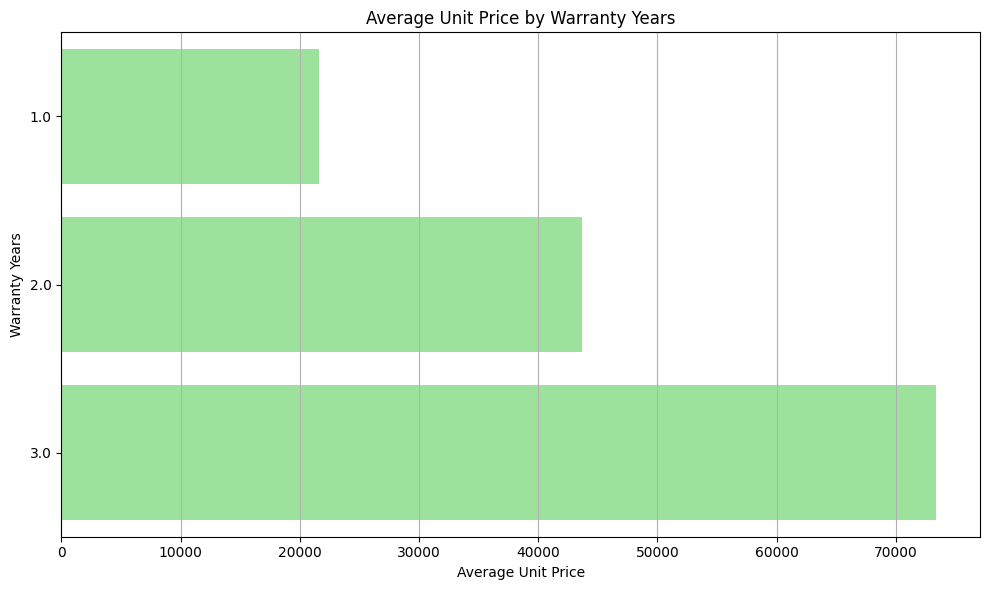

In [58]:

avg_unit_price_by_warranty = df.groupby('Warranty_Years')['Unit_Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_unit_price_by_warranty, y='Warranty_Years', x='Unit_Price', orient='h', color='lightgreen')
plt.title('Average Unit Price by Warranty Years')
plt.xlabel('Average Unit Price')
plt.ylabel('Warranty Years')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

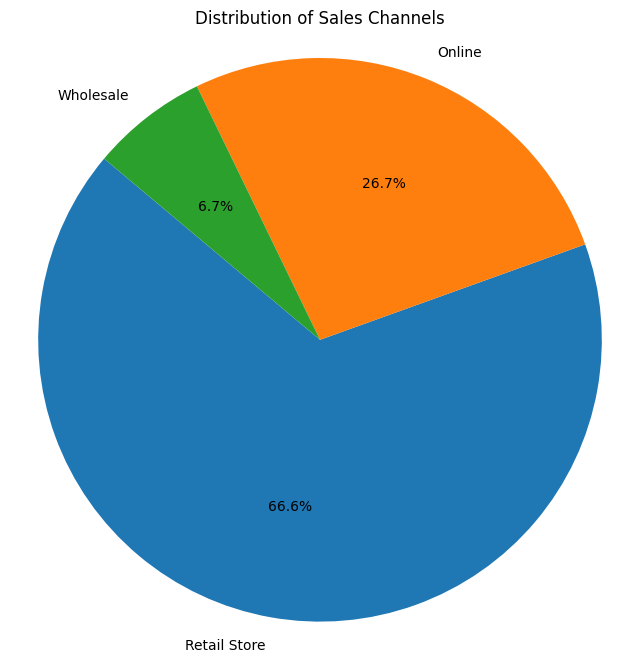

In [59]:
sales_channel_counts = df['Sales_Channel'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales Channels')
plt.axis('equal')
plt.show()